In [1]:
#Import the appropriate libraries 
%matplotlib inline

import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate

In [2]:
# Task 1: Connect to a cluster
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 18 mins
H2O cluster version:,3.10.1.1
H2O cluster version age:,"7 days, 3 hours and 52 minutes"
H2O cluster name:,chris
H2O cluster total nodes:,1
H2O cluster free memory:,13.65 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [4]:
# Task 2: Load data - 1 row per flight.  Has columns showing the origin,
# destination, departure and arrival time, carrier information, and
# whether the flight was delayed.
print("Import and Parse airlines data")
data = h2o.import_file(path='https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv')
data.describe()

Import and Parse airlines data
Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,17.0,14.0,-63.0,-16.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1997.500000000007,1.4090909090909112,14.601073263904548,3.8206148528809805,1345.8466613820847,1313.222861430723,1504.6341303788763,1485.28916731093,NaN,818.8429896766555,NaN,124.81452913540394,125.02156260661943,114.3161110907823,9.3171119369843,10.00739065560008,NaN,NaN,730.1821905650545,5.3813680595305895,14.168634184732053,0.024694165264450407,NaN,0.0024785119832643593,4.047800291055636,0.2893764692712416,4.855031904175528,0.017015560282100085,7.620060450016803,0.5557551503024238,0.5250579835372231
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,9.0,3949.0,3500.0,475.0,437.0,402.0,475.0,473.0,131.0,133.0,3365.0,128.0,254.0,1.0,3.0,1.0,369.0,201.0,323.0,14.0,373.0,1.0,1.0
sigma,6.344360901707364,1.8747113713439594,9.175790425861416,1.9050131191329,465.3408991242314,476.2511399926006,484.3474879035155,492.75043412270236,NaN,777.404369163635,NaN,73.97444166059002,73.40159463000958,69.63632951506123,29.84022196241487,26.438809042916432,NaN,NaN,578.4380082304231,4.201979939864828,9.9050857472043,0.15519314135784237,NaN,0.049723487218862286,16.205729904484198,4.416779898734125,18.619776221475668,0.4039401821015119,23.487565874106227,0.4968872883428838,0.49937738031758006
zeros,0,0,0,0,0,569,0,569,724,0,2,0,0,0,1514,6393,59,172,0,623,557,42892,81,43869,7344,8840,7388,8914,7140,19537,20887
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [5]:
# ----------

# 2- Data exploration and munging. Generate scatter plots 
# of various columns and plot fitted GLM model.

# Function to fit a GLM model and plot the fitted (x,y) values
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |███████████████████████████████████████████████| 100%


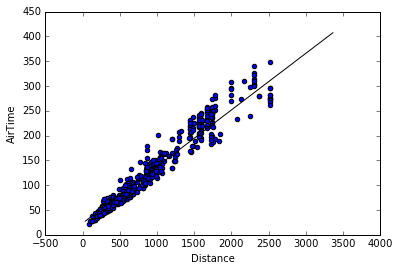

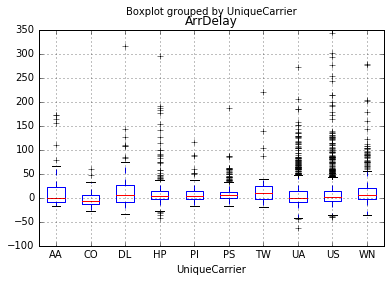

In [6]:
# Task 3: Generate scatterplots for "Distance" and "Airtime" and one for "Unique Carrier" and the "ArrDelay" 
scatter_plot(data, "Distance", "AirTime", fit = True)
scatter_plot(data, "UniqueCarrier", "ArrDelay", max_points = 5000, fit = False)

In [7]:
# Task 4: Use the .group_by function to group flights by month 
grouped = data.group_by("Month")
bpd = grouped.count().sum("Cancelled").frame
bpd.show()
bpd.describe()
bpd.dim


Month,sum_Cancelled,nrow_Year
1,1067,41979
10,19,1999


Rows:2
Cols:3




,Month,sum_Cancelled,nrow_Year
type,int,int,int
mins,1.0,19.0,1999.0
mean,5.5,543.0,21989.0
maxs,10.0,1067.0,41979.0
sigma,6.363961030678928,741.0479066835018,28270.12911183817
zeros,0,0,0
missing,0,0,0
0,1.0,1067.0,41979.0
1,10.0,19.0,1999.0


[2, 3]

In [8]:
# Task 5: Convert the "Year," "Month," "DayOfWeek," "Cancelled" columns to factors
data["Year"]      = data["Year"]     .asfactor()
data["Month"]     = data["Month"]    .asfactor()
data["DayOfWeek"] = data["DayOfWeek"].asfactor()
data["Cancelled"] = data["Cancelled"].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


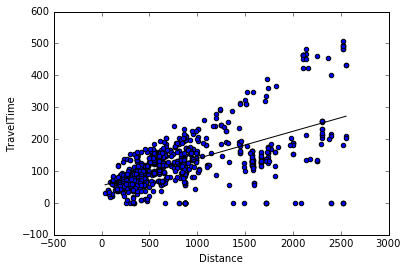

In [9]:
# Calculate and plot travel time
hour1 = data["CRSArrTime"] / 100
mins1 = data["CRSArrTime"] % 100
arrTime = hour1*60 + mins1

hour2 = data["CRSDepTime"] / 100
mins2 = data["CRSDepTime"] % 100
depTime = hour2*60 + mins2


data["TravelTime"] = (arrTime-depTime > 0).ifelse((arrTime-depTime), h2o.H2OFrame([[None]] * data.nrow))
scatter_plot(data, "Distance", "TravelTime")

glm Model Build progress: |███████████████████████████████████████████████| 100%


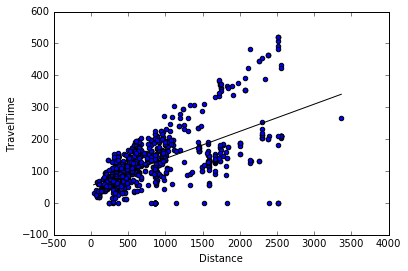

In [10]:
# Task 6: Impute missing travel times by the "Origin" and "Dest" columns and re-plot. 
data.impute(column = "Distance", by = ["Origin", "Dest"])
scatter_plot(data, "Distance", "TravelTime")

In [30]:
# Task 7: Create a test/train split
splits = data.split_frame([.75])
train = splits[0]
test = splits[1]

43978

In [12]:
# Task 8: Set response variable and your choice of predictor variables
myY = "IsDepDelayed"
myX = ["Origin", "Dest", "Year", "UniqueCarrier", "DayOfWeek", "Month", "Distance", "FlightNum"]

In [13]:
# Task 9: Build simple GLM model

data_glm = H2OGeneralizedLinearEstimator(family="binomial", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
# Task 10: Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        distribution   ="bernoulli",
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [15]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor        |   Normalized Coefficient |
|------------------+--------------------------|
| Year.2008        |               2.24345    |
| Year.2003        |               1.56592    |
| Year.2007        |               1.51587    |
| Origin.HPN       |               1.49035    |
| Origin.TRI       |               1.47252    |
| Origin.CAE       |               1.45465    |
| Dest.LYH         |               1.3459     |
| Origin.MDW       |               1.285      |
| Origin.LIH       |               1.27808    |
| Origin.TLH       |               1.26816    |
| Origin.LEX       |               1.24252    |
| Origin.MYR       |               1.22129    |
| Origin.OGG       |               1.21821    |
| Origin.HNL       |               1.18236    |
| Dest.HTS         |               1.17858    |
| UniqueCarrier.HP |               1.05843    |
| Dest.ICT         |               1.00366    |
| Year.2002        |               0.995075   |
| Origin.ERI     

[('Year', 2360.10400390625, 1.0, 0.8422023165084003),
 ('Origin', 442.196533203125, 0.18736315538266013, 0.1577976834915997),
 ('Month', 0.0, 0.0, 0.0),
 ('DayOfWeek', 0.0, 0.0, 0.0),
 ('UniqueCarrier', 0.0, 0.0, 0.0),
 ('FlightNum', 0.0, 0.0, 0.0),
 ('Dest', 0.0, 0.0, 0.0),
 ('Distance', 0.0, 0.0, 0.0)]

In [16]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.23404576525698326
RMSE: 0.48378276659776054
LogLoss: 0.6608719198653813
Mean Per-Class Error: 0.3512201159391206
AUC: 0.6777060836827385
Gini: 0.3554121673654771
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.450630627000934: 


,NO,YES,Error,Rate
NO,636.0,4575.0,0.878,(4575.0/5211.0)
YES,261.0,5534.0,0.045,(261.0/5795.0)
Total,897.0,10109.0,0.4394,(4836.0/11006.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4506306,0.6959256,19.0
max f2,0.4339883,0.8475692,20.0
max f0point5,0.5088656,0.6673769,12.0
max accuracy,0.5088656,0.6499182,12.0
max precision,0.6259072,0.7829755,0.0
max recall,0.4339883,1.0,20.0
max specificity,0.6259072,0.9456918,0.0
max absolute_mcc,0.5088656,0.2976537,12.0
max min_per_class_accuracy,0.5252527,0.6317405,11.0
max mean_per_class_accuracy,0.5088656,0.6487799,12.0


Gains/Lift Table: Avg response rate: 52.65 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1184808,0.6259072,1.4870454,1.4870454,0.7829755,0.7829755,0.1761864,0.1761864,48.7045369,48.7045369
,2,0.1675450,0.6079560,1.3364906,1.4429567,0.7037037,0.7597614,0.0655738,0.2417601,33.6490589,44.2956659
,3,0.2139742,0.5937649,1.2190710,1.3943768,0.6418787,0.7341826,0.0566005,0.2983607,21.9071033,39.4376806
,4,0.3211884,0.5547502,1.1797719,1.3227406,0.6211864,0.6964639,0.1264884,0.4248490,17.9771866,32.2740645
,5,0.4557514,0.5420925,1.2490504,1.3009832,0.6576637,0.6850080,0.1680759,0.5929249,24.9050411,30.0983221
,6,0.5243504,0.5252527,1.0464596,1.2676848,0.5509934,0.6674753,0.0717860,0.6647110,4.6459554,26.7684769
,7,0.6263856,0.5084049,0.7322919,1.1804718,0.3855744,0.6215550,0.0747196,0.7394305,-26.7708137,18.0471796
,8,0.8174632,0.4674336,0.7694429,1.0843960,0.4051355,0.5709681,0.1470233,0.8864538,-23.0557111,8.4396016
,9,0.9184990,0.4506306,0.6780501,1.0396976,0.3570144,0.5474330,0.0685073,0.9549612,-32.1949895,3.9697564
,10,1.0,0.4339883,0.5526169,1.0,0.2909699,0.5265310,0.0450388,1.0,-44.7383138,0.0
